Prepared By:
- Ashish Sharma <accssharma@gmail.com>
- AI Saturdays (week 5), June 16, 2018
- Organized by: AI Developers, Boise

## Support Vector Machine (SVM)

- Mostly used in a classification task
- Non-probabilistic classifier (in contrast to probabilistic Logistic Regression)
- Idea: Represent linearly separable examples as vectors in the space and find a large margin separating hyperplane.


Hyperplane:
- It's a plane that is 1 dimension less than the original data space, eg. if data space = 2, hyperplane is 1 dimensional.
- A hyperplane ALWAYS cuts the original plane into two halves! 
    - Try to visualize in 100 dimension!... I know!! ;)

Use Cases
- Supervised classification/regression
- Outlier detection (see one-class SVM in scikit-learn)
- Sometimes used in unsupervised learning to group unlabeled data using clustering and then performing classification task [more on support vector clustering here](https://en.wikipedia.org/wiki/Support_vector_machine)

Confidence in making prediction
- functional margin (the higher the better) 
    - **y_hat_i = y_true_i * (w_vector_transpose * x_vector_i + b) (ith example)**

Kernel trick
- Linear support vector machine (i.e. without any smart transformation of data space to higher dimension), works well if the true data itself is linearly separable. (Question: how do I know if the data is linearly separable? Answer: Plot a 2/3 dimensional data (you can apply concepts like Principal Component Analysis(PCA) to reduce the dimensionality of the data while preserving the most of the variance in the data) over 2 categories, and if you draw a line (for 2d data space) or a 2d plane (3d data space), then you can fairly assume that your data is lineary separable.
- if the data is not lineraly separable, then SVM offers a concept called Kernel trick that lets you transform your data on higher dimension so that you can find a hyperplane that separates your categories.

Pros:
- Good at dealing with high-dimensional data
- More suitable for smaller datasets

Cons:
- picking right kernel and parameters is complex and computationally expensive

- powerful tool, but their compute and storage requirements increase rapidly with the number of training vectors. The core of an SVM is a quadratic programming problem (QP), separating support vectors from the rest of the training data.

## Agenda
- Intuition: [How SVM (Support Vector Machine)](https://www.youtube.com/watch?v=1NxnPkZM9bc)
- [Mathematical Interpretation](https://www.coursera.org/learn/machine-learning/lecture/3eNnh/mathematics-behind-large-margin-classification)
- Demonstration

**Classifying Muffins and Cupcakes with SVM using Scikit Learn**

Demonstration taken from here: 
- [Muffins vs Cupcakes classification Youtube](https://www.youtube.com/watch?v=N1vOgolbjSc)
- [Muffins vs Cupcakes classification Github](https://github.com/adashofdata/muffin-cupcake)

__Step 1:__ Import Packages

In [1]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle

__Step 2:__ Import Data

In [2]:
# Read in muffin and cupcake ingredient data
recipes = pd.read_csv('recipes_muffins_cupcakes.csv')
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


__Step 3:__ Prepare the Data

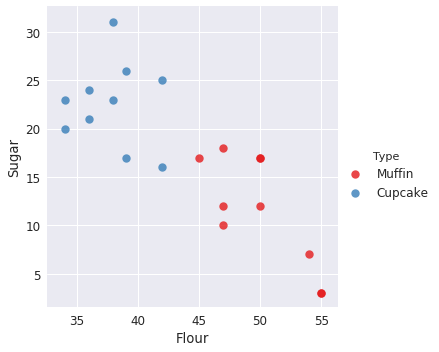

In [5]:
# Plot two ingredients
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [6]:
# Specify inputs for the model
# ingredients = recipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']].as_matrix()
ingredients = recipes[['Flour','Sugar']].as_matrix()
type_label = np.where(recipes['Type']=='Muffin', 0, 1)

# Feature names
recipe_features = recipes.columns.values[1:].tolist()
recipe_features

/home/asharma/.miniconda2/envs/machine-learning/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

__Step 4:__ Fit the Model

In [7]:
# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

__Step 5:__ Visualize Results

In [8]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
w,a

(array([-6.66503014e-01, -7.77156117e-16]), -857617921181270.0)

In [9]:
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]
xx.shape, yy.shape

((50,), (50,))

In [10]:
# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
print(b)
yy_down = a * xx + (b[1] - a * b[0])

[45. 17.]


In [11]:
b = model.support_vectors_[-1]
print(b)
yy_up = a * xx + (b[1] - a * b[0])

[42. 25.]


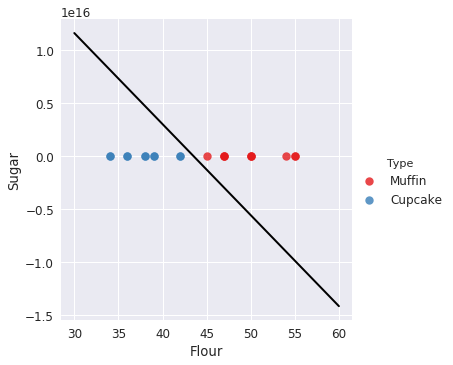

In [12]:
# Plot the hyperplane
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

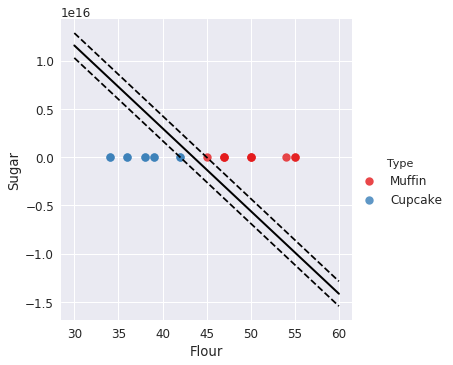

In [13]:
# Look at the margins and support vectors
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

__Step 6:__ Predict New Case

In [14]:
# Create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [15]:
# Predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(50, 20)

You're looking at a muffin recipe!


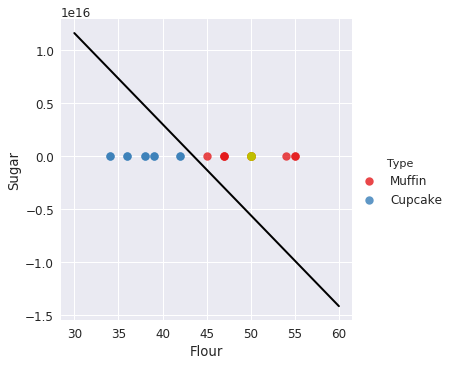

In [16]:
# Plot the point to visually see where the point lies
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(50, 20, 'yo', markersize='9');

In [17]:
# Predict if 40 parts flour and 20 parts sugar
muffin_or_cupcake(40,20)

You're looking at a cupcake recipe!


In [18]:
muffin_cupcake_dict = {'muffin_cupcake_model': model, 'muffin_cupcake_features': ['Flour','Sugar'], 'all_features': recipe_features}

In [19]:
muffin_cupcake_dict

{'muffin_cupcake_model': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 'muffin_cupcake_features': ['Flour', 'Sugar'],
 'all_features': ['Flour',
  'Milk',
  'Sugar',
  'Butter',
  'Egg',
  'Baking Powder',
  'Vanilla',
  'Salt']}

In [20]:
# Pickle
pickle.dump(muffin_cupcake_dict, open("muffin_cupcake_dict.p", "wb"))

In [22]:
# pickle.dumps(muffin_cupcake_dict)